In [1]:
import os
import numpy as np
import rasterio
import re
import matplotlib.pyplot as plt

In [2]:
# Cek Direktori
print("Direktori kerja saat ini:", os.getcwd())

Direktori kerja saat ini: d:\Geodatabase\Visualisasi_Data_Raster


CLEANING DATA

In [3]:
# File path folder asal dan tujuan
input_folder = r"D:\Geodatabase\Visualisasi_Data_Raster\01_Raw_Data"  # Ganti dengan folder input
output_folder = r"D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning"  # Ganti dengan folder output

# Buat folder output jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [4]:
# Membaca nilai min dan max dari semua raster
print("Membaca nilai min dan max:")
for file_name in os.listdir(input_folder):
    if file_name.endswith('.tif'):  # Filter hanya file raster
        input_path = os.path.join(input_folder, file_name)
        
        with rasterio.open(input_path) as src:
            data = src.read(1)  # Membaca band pertama
            
            # Hitung nilai min dan max
            min_val = data.min()
            max_val = data.max()
            
            # Cetak nilai min dan max
            print(f"File: {file_name}, Min: {min_val}, Max: {max_val}")

Membaca nilai min dan max:
File: Kota_Malang_Prec_01.tif, Min: -1.0, Max: 457.0
File: Kota_Malang_Prec_02.tif, Min: -1.0, Max: 401.0
File: Kota_Malang_Prec_03.tif, Min: -1.0, Max: 400.0
File: Kota_Malang_Prec_04.tif, Min: -1.0, Max: 277.0
File: Kota_Malang_Prec_05.tif, Min: -1.0, Max: 183.0
File: Kota_Malang_Prec_06.tif, Min: -1.0, Max: 87.0
File: Kota_Malang_Prec_07.tif, Min: -1.0, Max: 69.0
File: Kota_Malang_Prec_08.tif, Min: -1.0, Max: 45.0
File: Kota_Malang_Prec_09.tif, Min: -1.0, Max: 90.0
File: Kota_Malang_Prec_10.tif, Min: -1.0, Max: 178.0
File: Kota_Malang_Prec_11.tif, Min: -1.0, Max: 333.0
File: Kota_Malang_Prec_12.tif, Min: -1.0, Max: 459.0


In [5]:
# Menghilangkan nilai -1 menjadi NoData (NaN) dan menyimpan hasil
print("\nMemproses cleaning data:")
for file_name in os.listdir(input_folder):
    if file_name.endswith('.tif'):  # Filter hanya file raster
        input_path = os.path.join(input_folder, file_name)
        
        with rasterio.open(input_path) as src:
            data = src.read(1)  # Membaca band pertama
            meta = src.meta

            # Cleaning data: ganti nilai -1 dengan NoData (NaN)
            data_cleaned = np.where(data == -1, np.nan, data)

            # Update metadata untuk mencocokkan data yang diubah
            meta.update(dtype='float32', nodata=np.nan)

            # Menambahkan "_V1" ke nama file output
            base_name, ext = os.path.splitext(file_name)
            new_file_name = f"{base_name}_V1{ext}"
            output_path = os.path.join(output_folder, new_file_name)

            # Simpan hasil raster yang sudah dibersihkan
            with rasterio.open(output_path, 'w', **meta) as dst:
                dst.write(data_cleaned, 1)

        print(f"Hasil sudah tersimpan: {output_path}")


Memproses cleaning data:
Hasil sudah tersimpan: D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning\Kota_Malang_Prec_01_V1.tif
Hasil sudah tersimpan: D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning\Kota_Malang_Prec_02_V1.tif
Hasil sudah tersimpan: D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning\Kota_Malang_Prec_03_V1.tif
Hasil sudah tersimpan: D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning\Kota_Malang_Prec_04_V1.tif
Hasil sudah tersimpan: D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning\Kota_Malang_Prec_05_V1.tif
Hasil sudah tersimpan: D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning\Kota_Malang_Prec_06_V1.tif
Hasil sudah tersimpan: D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning\Kota_Malang_Prec_07_V1.tif
Hasil sudah tersimpan: D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning\Kota_Malang_Prec_08_V1.tif
Hasil sudah tersimpan: D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning\Kota_Malang_Prec_09_V1.tif
Hasil sudah

In [6]:
# Bagian 3: Membaca nilai min dan max dari raster output
print("\nMembaca nilai min dan max dari raster output:")
for file_name in os.listdir(output_folder):
    if file_name.endswith('.tif'):  # Filter hanya file raster
        output_path = os.path.join(output_folder, file_name)
        
        with rasterio.open(output_path) as src:
            data = src.read(1)  # Membaca band pertama

            # Hitung nilai min dan max
            min_val = np.nanmin(data)
            max_val = np.nanmax(data)

            # Cetak nilai min dan max
            print(f"File: {file_name}, Min: {min_val}, Max: {max_val}")


Membaca nilai min dan max dari raster output:
File: Kota_Malang_Prec_01_V1.tif, Min: 341.0, Max: 457.0
File: Kota_Malang_Prec_02_V1.tif, Min: 299.0, Max: 401.0
File: Kota_Malang_Prec_03_V1.tif, Min: 307.0, Max: 400.0
File: Kota_Malang_Prec_04_V1.tif, Min: 195.0, Max: 277.0
File: Kota_Malang_Prec_05_V1.tif, Min: 149.0, Max: 183.0
File: Kota_Malang_Prec_06_V1.tif, Min: 73.0, Max: 87.0
File: Kota_Malang_Prec_07_V1.tif, Min: 48.0, Max: 69.0
File: Kota_Malang_Prec_08_V1.tif, Min: 23.0, Max: 45.0
File: Kota_Malang_Prec_09_V1.tif, Min: 55.0, Max: 90.0
File: Kota_Malang_Prec_10_V1.tif, Min: 119.0, Max: 178.0
File: Kota_Malang_Prec_11_V1.tif, Min: 228.0, Max: 333.0
File: Kota_Malang_Prec_12_V1.tif, Min: 334.0, Max: 459.0


STACKING DATA

In [7]:
# File path folder asal dan tujuan
input_folder = r"D:\Geodatabase\Visualisasi_Data_Raster\02_Hasil_Cleaning" # Ganti dengan folder input
output_folder = r"D:\Geodatabase\Visualisasi_Data_Raster\03_Stacking_Raster"  # Ganti dengan folder ouput

# Buat folder output jika belum ada
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [8]:
# Dapatkan daftar file TIFF di folder input
raster_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.tif')])

# Tampilkan daftar file yang ditemukan
print("Daftar file raster yang ditemukan di input folder:")
for raster_file in raster_files:
    print(raster_file)

Daftar file raster yang ditemukan di input folder:
Kota_Malang_Prec_01_V1.tif
Kota_Malang_Prec_02_V1.tif
Kota_Malang_Prec_03_V1.tif
Kota_Malang_Prec_04_V1.tif
Kota_Malang_Prec_05_V1.tif
Kota_Malang_Prec_06_V1.tif
Kota_Malang_Prec_07_V1.tif
Kota_Malang_Prec_08_V1.tif
Kota_Malang_Prec_09_V1.tif
Kota_Malang_Prec_10_V1.tif
Kota_Malang_Prec_11_V1.tif
Kota_Malang_Prec_12_V1.tif


In [9]:
# Fungsi untuk mengekstrak nama band dari nama file
def extract_band_name(filename):
    match = re.search(r'Kota_Malang_Prec_(\d{2})_V1', filename)
    if match:
        return f"Prec_{match.group(1)}"
    return None

In [10]:
# Daftar untuk menyimpan data raster dan nama band
rasters = []
band_names = []

In [11]:
# Baca setiap file raster dan tambahkan ke daftar raster dan nama band
for raster_file in raster_files:
    band_name = extract_band_name(raster_file)
    if band_name:
        file_path = os.path.join(input_folder, raster_file)
        with rasterio.open(file_path) as src:
            rasters.append(src.read(1))  # Asumsikan setiap raster memiliki single band
            band_names.append(band_name)

In [12]:
# Stack raster menjadi array 3D (stack dari array 2D)
raster_stack = np.stack(rasters, axis=0)

In [13]:
# Ambil metadata dari salah satu file raster untuk output
with rasterio.open(os.path.join(input_folder, raster_files[0])) as src:
    meta = src.meta.copy()

In [14]:
# Ubah metadata untuk menyesuaikan dengan output multi-band
meta.update(count=len(rasters))

In [15]:
# Tentukan nama output file TIFF
output_path = os.path.join(output_folder, 'Kota_Malang_Presipitasi_Bulanan.tif')

In [16]:
# Menulis stack raster ke file TIFF multi-band
with rasterio.open(output_path, 'w', **meta) as dst:
    for i in range(raster_stack.shape[0]):
        dst.write(raster_stack[i, :, :], i + 1)  # Menulis setiap band
    dst.descriptions = band_names  # Menetapkan deskripsi band sesuai dengan nama band

print(f"Stacking raster berhasil disimpan di {output_path}")

Stacking raster berhasil disimpan di D:\Geodatabase\Visualisasi_Data_Raster\03_Stacking_Raster\Kota_Malang_Presipitasi_Bulanan.tif


In [17]:
# Baca file stacking dan tampilkan informasi min-max setiap band
with rasterio.open(output_path) as src:
    print(f"Jumlah band: {src.count}")
    
    # Iterasi setiap band
    for i in range(1, src.count + 1):
        band_data = src.read(i)  # Baca data band
        band_name = src.descriptions[i - 1]  # Nama band dari deskripsi
        
        # Hitung nilai min dan max, abaikan NaN
        min_val = np.nanmin(band_data)
        max_val = np.nanmax(band_data)
        
        print(f"Band {i} = {band_name}: Min = {min_val}, Max = {max_val}")

Jumlah band: 12
Band 1 = Prec_01: Min = 341.0, Max = 457.0
Band 2 = Prec_02: Min = 299.0, Max = 401.0
Band 3 = Prec_03: Min = 307.0, Max = 400.0
Band 4 = Prec_04: Min = 195.0, Max = 277.0
Band 5 = Prec_05: Min = 149.0, Max = 183.0
Band 6 = Prec_06: Min = 73.0, Max = 87.0
Band 7 = Prec_07: Min = 48.0, Max = 69.0
Band 8 = Prec_08: Min = 23.0, Max = 45.0
Band 9 = Prec_09: Min = 55.0, Max = 90.0
Band 10 = Prec_10: Min = 119.0, Max = 178.0
Band 11 = Prec_11: Min = 228.0, Max = 333.0
Band 12 = Prec_12: Min = 334.0, Max = 459.0


VISUALISASI DATA

In [18]:
# File path folder asal dan tujuan
stacked_file = r"D:\Geodatabase\Visualisasi_Data_Raster\03_Stacking_Raster\Kota_Malang_Presipitasi_Bulanan.tif"
output_folder_vis = r"D:\Geodatabase\Visualisasi_Data_Raster\04_Hasil_Visualisasi"

# Buat folder output jika belum ada
if not os.path.exists(output_folder_vis):
    os.makedirs(output_folder_vis)

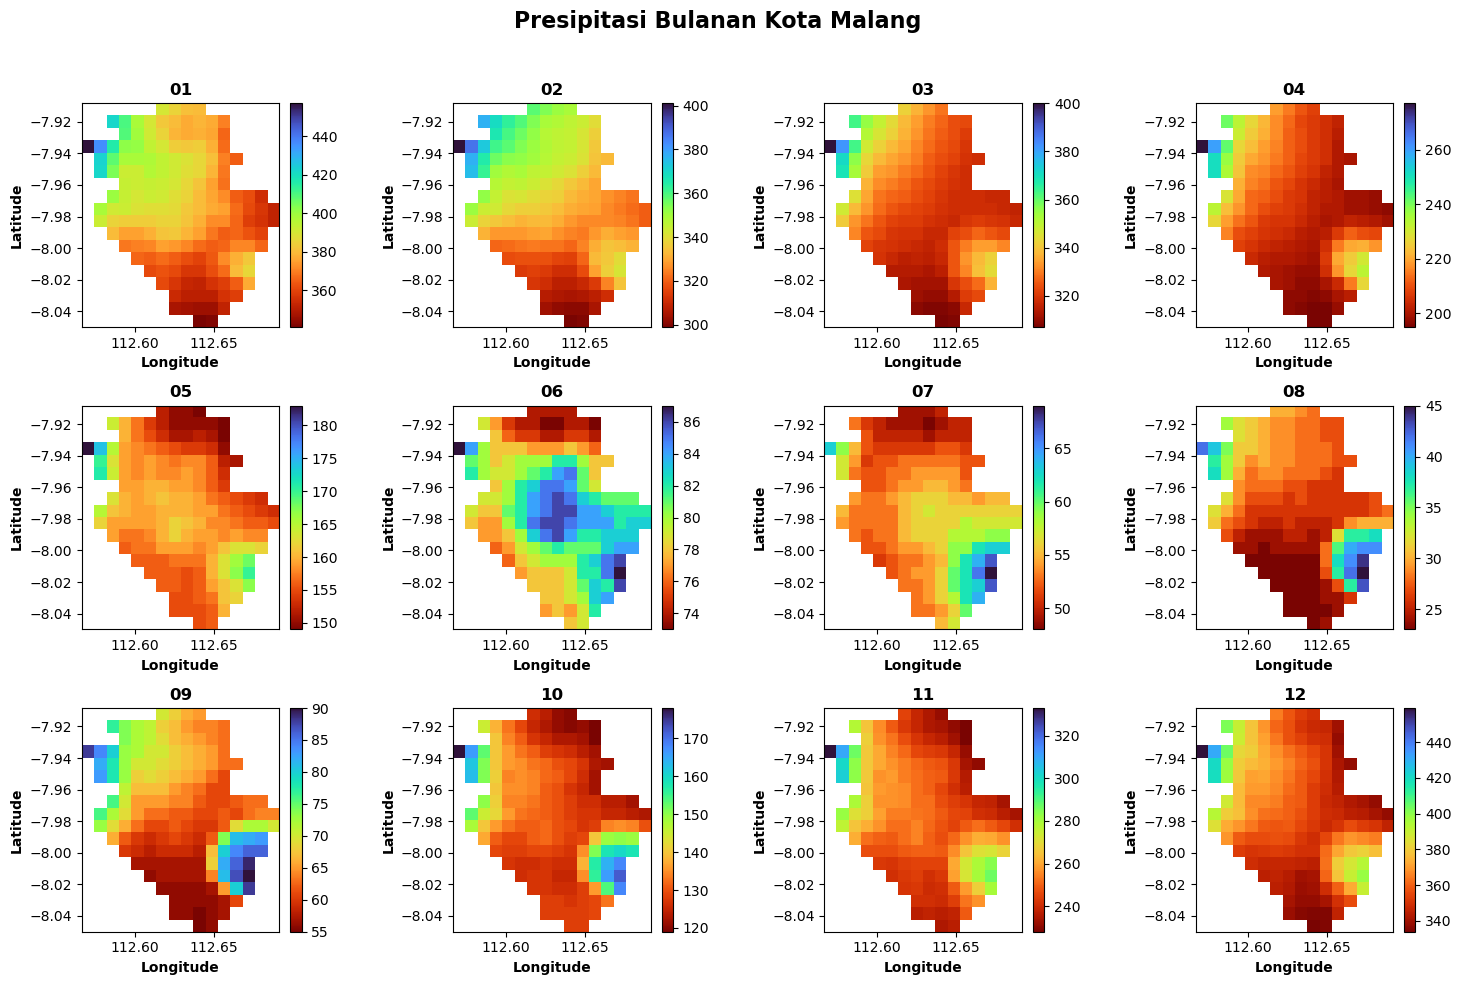

Menyimpan visualisasi ke file: D:\Geodatabase\Visualisasi_Data_Raster\04_Hasil_Visualisasi\Presipitasi_Bulanan_Kota_Malang_V1.png


In [19]:
# Visualisasi Berdasarkan Nilai Minimum dan Maksimum Setiap Bulan
# Baca file stacking
with rasterio.open(stacked_file) as src:
    num_bands = src.count  # Jumlah band
    band_names = src.descriptions  # Nama-nama band
    transform = src.transform  # Transformasi koordinat

    # Tentukan ukuran grid berdasarkan jumlah band (misalnya, 3x4 untuk 12 band)
    num_cols = 4  # Kolom
    num_rows = int(np.ceil(num_bands / num_cols))  # Baris

    # Buat ukuran plot dan grid subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    fig.suptitle("Presipitasi Bulanan Kota Malang", fontsize=16, fontweight='bold')

    # Flatten axes untuk memudahkan iterasi
    axes = axes.flatten()

    # Iterasi setiap band
    for i in range(num_bands):
        band_data = src.read(i + 1)  # Baca data band
        
        # Dapatkan ukuran raster
        rows, cols = band_data.shape
        
        # Buat meshgrid untuk koordinat geografis
        x_coords, y_coords = np.meshgrid(
            np.arange(cols), np.arange(rows)
        )
        x_coords = transform[2] + x_coords * transform[0]  # Transformasi kolom ke koordinat x (longitude)
        y_coords = transform[5] + y_coords * transform[4]  # Transformasi baris ke koordinat y (latitude)

        # Plot setiap band di subplot grid
        ax = axes[i]
        im = ax.imshow(band_data, cmap="turbo_r", interpolation="none", extent=(x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()))
        im.set_clim(vmin=np.nanmin(band_data), vmax=np.nanmax(band_data))  # Tetapkan range visualisasi
        
        # Hilangkan kata "Prec" dari nama band jika ada
        title = band_names[i].replace("Prec_", "") if band_names[i] else f"Band {i+1}"
        ax.set_title(title, fontweight='bold')  # Judul berdasarkan nama band
        ax.set_xlabel("Longitude", fontweight='bold')
        ax.set_ylabel("Latitude", fontweight='bold')

        # Tambahkan colorbar di setiap plot
        fig.colorbar(im, ax=ax, orientation="vertical", fraction=0.046, pad=0.04)

    # Hilangkan subplot yang tidak terpakai jika jumlah band kurang dari jumlah grid
    for j in range(num_bands, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Sesuaikan tata letak agar tidak bertumpukan dengan judul

    # Simpan hasil plot ke file gambar
    output_file = os.path.join(output_folder_vis, 'Presipitasi_Bulanan_Kota_Malang_V1.png')
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

print(f"Menyimpan visualisasi ke file: {output_file}")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17740\755940213.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.96])  # Sesuaikan tata letak agar tidak bertumpukan dengan judul dan colorbar


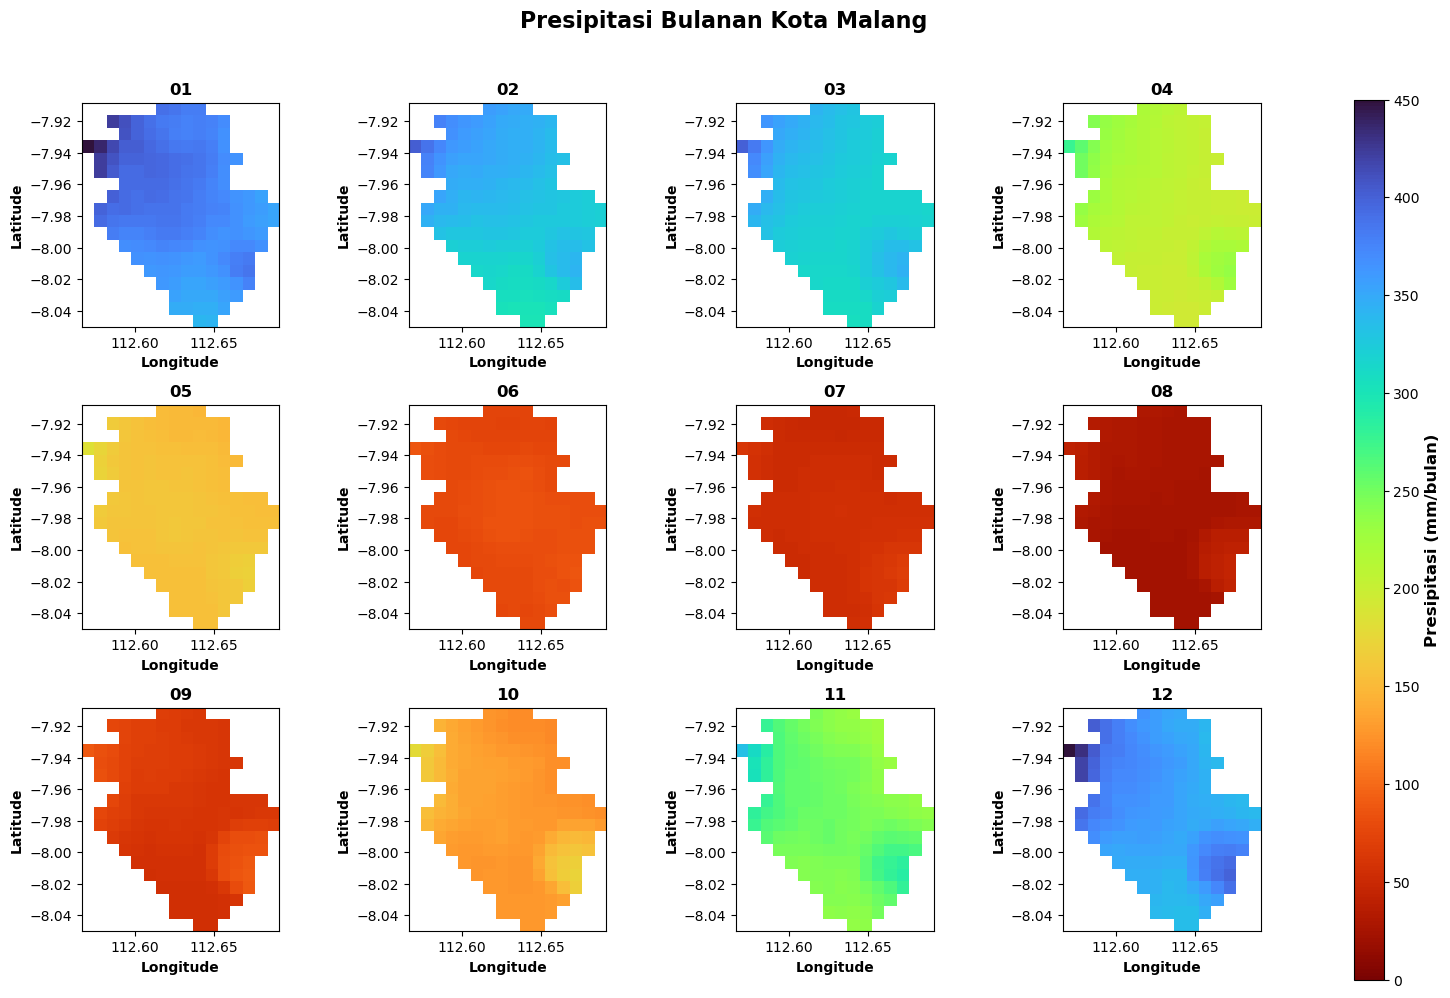

Menyimpan visualisasi ke file: D:\Geodatabase\Visualisasi_Data_Raster\04_Hasil_Visualisasi\Presipitasi_Bulanan_Kota_Malang_V2.png


In [20]:
# Visualisasi Berdasarkan Nilai Minimum dan Maksimum seluruh Bulan Dalam Satu Tahun
# Baca file stacking
with rasterio.open(stacked_file) as src:
    num_bands = src.count  # Jumlah band
    band_names = src.descriptions  # Nama-nama band
    transform = src.transform  # Transformasi koordinat

    # Tentukan ukuran grid berdasarkan jumlah band (misalnya, 3x4 untuk 12 band)
    num_cols = 4  # Kolom
    num_rows = int(np.ceil(num_bands / num_cols))  # Baris
    
    # Buat ukuran plot dan grid subplot
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    fig.suptitle("Presipitasi Bulanan Kota Malang", fontsize=16, fontweight='bold')
    
    # Flatten axes untuk memudahkan iterasi
    axes = axes.flatten()
    
    # Tentukan nilai min dan max untuk color map
    vmin, vmax = 0, 450
    
    # Iterasi setiap band
    for i in range(num_bands):
        band_data = src.read(i + 1)  # Baca data band
        
        # Dapatkan ukuran raster
        rows, cols = band_data.shape
        
        # Buat meshgrid untuk koordinat geografis
        x_coords, y_coords = np.meshgrid(
            np.arange(cols), np.arange(rows)
        )
        x_coords = transform[2] + x_coords * transform[0]  # Transformasi kolom ke koordinat x (longitude)
        y_coords = transform[5] + y_coords * transform[4]  # Transformasi baris ke koordinat y (latitude)
    
        # Plot setiap band di subplot grid
        ax = axes[i]
        im = ax.imshow(band_data, cmap="turbo_r", interpolation="none", extent=(x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()))
        im.set_clim(vmin=vmin, vmax=vmax)  # Tetapkan range visualisasi sesuai nilai min max 
        
        # Hilangkan kata "Prec" dari nama band jika ada
        title = band_names[i].replace("Prec_", "") if band_names[i] else f"Band {i+1}"
        ax.set_title(title, fontweight='bold')  # Judul berdasarkan nama band
        ax.set_xlabel("Longitude", fontweight='bold')
        ax.set_ylabel("Latitude", fontweight='bold')
    
    # Hilangkan subplot yang tidak terpakai jika jumlah band kurang dari jumlah grid
    for j in range(num_bands, len(axes)):
        fig.delaxes(axes[j])
    
    # Tambahkan satu colorbar di samping semua subplot
    cbar_ax = fig.add_axes([0.92, 0.01, 0.02, 0.88])  # [left, bottom, width, height]
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap="turbo_r", norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.set_label("Presipitasi (mm/bulan)", fontsize=12, fontweight='bold')
    
    plt.tight_layout(rect=[0, 0, 0.9, 0.96])  # Sesuaikan tata letak agar tidak bertumpukan dengan judul dan colorbar
    
    # Simpan hasil plot ke file gambar
    output_file = os.path.join(output_folder_vis, 'Presipitasi_Bulanan_Kota_Malang_V2.png')
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()
    
print(f"Menyimpan visualisasi ke file: {output_file}")